 method : Real_space_method 
 [ 7.14259565  7.36011379 27.55629148]
 method : Sequence_method 
 [ 7.10009626  7.32477748 27.40041967]


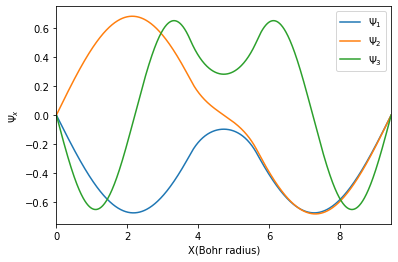

In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy import sin , cos , pi

class Quantum_well:
    
    def __init__(self,potential,potential_length,potential_height):
        
        self.Hartree,self.Bohr = 27.211386 , 1.88973     
        self.potential = potential/self.Hartree
        self.potential_length = potential_length*self.Bohr
        self.potential_height = potential_height*self.Bohr
        
    def Show_eigenvalue(self):
        
        print(" method : %s \n"%self.method,self.eigenvalue[:3])
        
class Real_space_method(Quantum_well) :
    
    def Eigenvalue_calculator(self):
        global V0 , a ,L
        self.method = "Real_space_method"
        
        V0 , a , L = self.potential,self.potential_height,self.potential_length
        
        Xmin , Xmax , Mesh= 0,L,400
        x = np.arange( Xmin , Xmax , h:=(Xmax - Xmin)/Mesh)
        
        c0 , c1 = 2/(h**2),-1/(h**2)
        T = c0*np.diag(np.ones(Mesh-1))+c1*np.diag(np.ones(Mesh-2),1)+c1*np.diag(np.ones(Mesh-2),-1)
        
        V = np.diag(np.zeros(Mesh-1)) 
        for i,j in enumerate(x[1:]):
            filter_function = lambda j : V0*2 if j >= ((L/2)-(a/2)) and j <= ((L/2)+(a/2)) else 0
            V[i][i]=filter_function(j)
            
        Hamiltonian = T + V
        self.eigenvalue = la.eigvalsh(Hamiltonian)*self.Hartree*(1/2)
        
class Sequence_method(Real_space_method):
    
    def Eigen_calculator(self):
        self.method = "Sequence_method"
        Hamiltonian = np.diag(np.zeros(500))
        
        func_1 = lambda n , m : ((V0/L))*(a - (L/(n*pi))*cos(n*pi)*sin(n*pi*(a/L))) +  (1/2)*((n*pi)/L)**2
        func_2 = lambda n ,m : ((2*V0)/pi)*(((1/(m-n))*cos((m-n)*(pi/2))*sin((pi/L)*(m-n)*(a/2)))-((1/(m+n))*cos((m+n)*(pi/2))*sin((pi/L)*(m+n)*(a/2))))

        for m in range(1,501):
            for n in range(1,501):
                
                if m==n:
                    Hamiltonian[m-1][n-1] = func_1(n,m)
                    
                else :
                    Hamiltonian[m-1][n-1] = func_2(n,m)

        val , vec = la.eigh(Hamiltonian)

        self.eigenvalue=val*self.Hartree
        def Psi_func(x,m,L,vec,psi = 0):
            
            for n in range(1,501):
                
                psi = psi + (2/np.sqrt(L))*(vec[n-1][m-1]*sin((n*pi*x)/L))
                
            return psi
        
        x = np.linspace(0,L,1000)
        
        for i in range(1,4):
            
            plt.plot(x,Psi_func(x,i,L,vec),label="$Ψ_%i$"%i)
            plt.xlim(min(x),max(x))
        
            plt.xlabel("X(Bohr radius)")
            plt.ylabel("$Ψ_x$")
        
            plt.legend()
    
    
potentional1 = Sequence_method(50,5,1)
potentional1.Eigenvalue_calculator()
potentional1.Show_eigenvalue()
potentional1.Eigen_calculator()
potentional1.Show_eigenvalue()
